
### Dataset: [Le Petit Prince: A multilingual fMRI corpus using ecological stimuli](https://openneuro.org/datasets/ds003643/versions/2.0.1)


In [1]:
! pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


## Here we will load the merge_image directly

In [2]:
!gdown 1h0MjH9fx4BnlABsnpLugWCxNimLSQSkP -O merged_image_EN.zip

Downloading...
From: https://drive.google.com/uc?id=1h0MjH9fx4BnlABsnpLugWCxNimLSQSkP
To: /content/merged_image_EN.zip
100% 182M/182M [00:01<00:00, 109MB/s]


In [8]:
! unzip merged_image_EN.zip

Archive:  merged_image_EN.zip
replace content/merged_image_EN.nii? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: content/merged_image_EN.nii  


In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

img = nib.load("/content/content/merged_image_EN.nii")
img_data = img.get_fdata()


In [11]:
print(img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (73, 90, 74, 282)
affine:
[[   2.   -0.   -0.  -72.]
 [  -0.    2.   -0. -106.]
 [   0.    0.    2.  -64.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  73  90  74 282   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : a

In [12]:
from nilearn.decomposition import CanICA

canica = CanICA(
    n_components=20,
    memory="nilearn_cache",
    memory_level=2,
    verbose=10,
    mask_strategy="whole-brain-template",
    random_state=0,
    standardize="zscore_sample",
)
canica.fit(img)

[MultiNiftiMasker.fit] Loading data from [Nifti1Image('/content/content/merged_image_EN.nii')].
[{self.__class__.__name__}.fit] Computing mask


/usr/local/lib/python3.10/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


Template whole-brain mask computation


/usr/local/lib/python3.10/dist-packages/nilearn/masking.py:648: UserWarning: Persisting input arguments took 4.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resampling.resample_to_img, memory)(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:810: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), i

[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/content/content/merged_image_EN.nii')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:542: UserWarning: Persisting input arguments took 4.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = self._cache(
/usr/local/lib/python3.10/dist-packages/nilearn/decomposition/_base.py:233: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  U, S, V = cache(


________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00064 , ..., 0.000274],
       ...,
       [0.00232 , ..., 0.000754]]), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 1.6s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=209652396)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 55.1s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=398764591)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.3s remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


_________________________________________________________fastica - 56.7s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=924231285)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 55.6s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=1478610112)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.8min remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 55.0s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=441365315)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.7min remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.7min remaining:    0.0s


_________________________________________________________fastica - 56.2s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=1537364731)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.6min remaining:    0.0s


_________________________________________________________fastica - 55.1s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=192771779)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.5min remaining:    0.0s


_________________________________________________________fastica - 55.3s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=1491434855)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 58.8s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=1819583497)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.5min remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 55.9s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001287, ..., -0.001246],
       ...,
       [-0.002836, ..., -0.004103]]), whiten='arbitrary-variance', fun='cube', random_state=530702035)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.4min remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


_________________________________________________________fastica - 55.4s, 0.9min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.3min finished


CanICA(mask_strategy='whole-brain-template',
       memory=Memory(location=nilearn_cache/joblib), memory_level=2,
       random_state=0, standardize='zscore_sample', verbose=10)

/usr/local/lib/python3.10/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


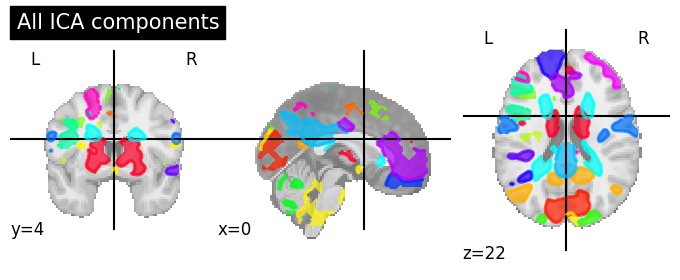

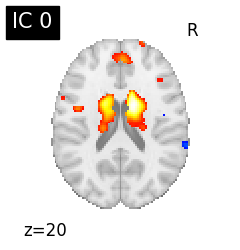

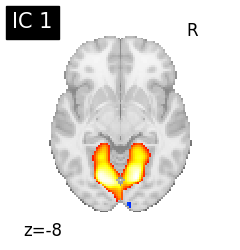

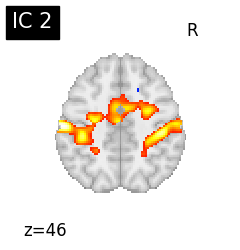

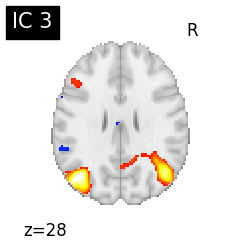

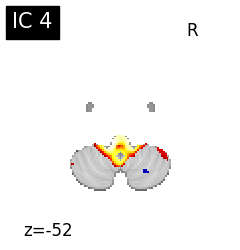

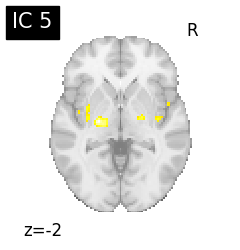

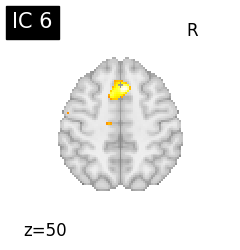

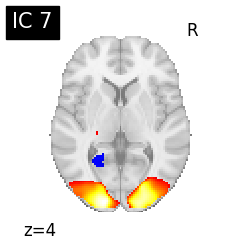

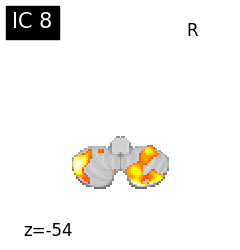

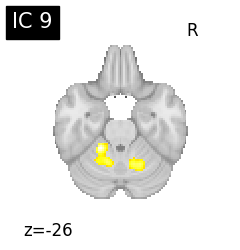

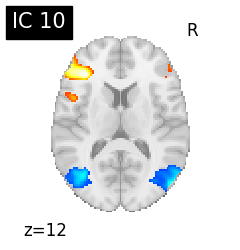

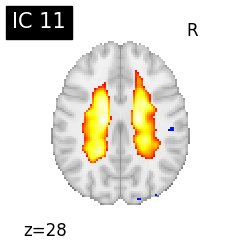

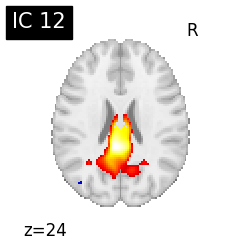

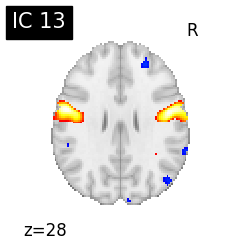

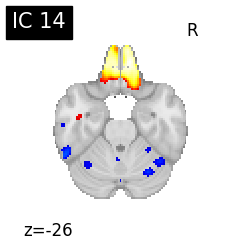

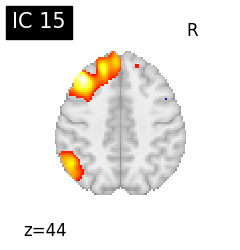

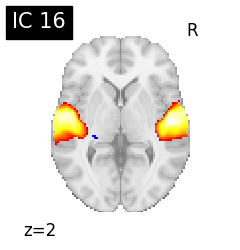

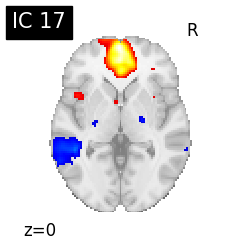

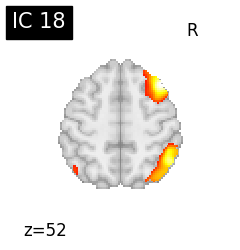

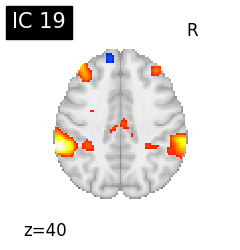

In [13]:
canica_components_img = canica.components_img_

from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(canica_components_img, title="All ICA components")
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show


for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(
        cur_img,
        display_mode="z",
        title=f"IC {int(i)}",
        cut_coords=1,
        colorbar=False,
    )


## Another way: DictLearning

In [14]:
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=20, verbose=10,
                          memory="nilearn_cache", memory_level=2,mask_strategy='whole-brain-template',
                          random_state=0,standardize="zscore_sample")
# Fit to the data
dict_learn.fit(img)
# Resting state networks/maps in attribute `components_img_`
# Note that this attribute is implemented from version 0.4.1.
# For older versions, see the note section above for details.
components_img = dict_learn.components_img_

[MultiNiftiMasker.fit] Loading data from [Nifti1Image('/content/content/merged_image_EN.nii')].
[{self.__class__.__name__}.fit] Computing mask


/usr/local/lib/python3.10/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


Template whole-brain mask computation


/usr/local/lib/python3.10/dist-packages/nilearn/masking.py:648: UserWarning: Persisting input arguments took 4.30s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resampling.resample_to_img, memory)(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:810: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8d0d8abf40>, mask_type='whole-brain'), i

[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/content/content/merged_image_EN.nii')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:542: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = self._cache(
/usr/local/lib/python3.10/dist-packages/nilearn/decomposition/_base.py:233: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  U, S, V = cache(


[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002119, ..., -0.001058],
       ...,
       [ 0.002957, ..., -0.000866]]), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001147, ...,  0.002379],
       ...,
       [-0.000188, ..., -0.002145]]), whiten='arbitrary-variance', fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 55.5s, 0.9min
[DictLearning] Computing initial loadings


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.7s finished


________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000996, ..., -0.004082],
       ...,
       [-0.000337, ..., -0.001406]]), 
array([[ 5.469717, ...,  7.632263],
       ...,
       [-0.740555, ..., -0.606305]]))
_________________________________________________compute_loadings - 0.2s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.469717, ..., -0.740555],
       ...,
       [ 7.632263, ..., -0.606305]]), 
20, alpha=10, n_iter=10765, batch_size=20, method='cd', dict_init=array([[0.110056, ..., 0.031697],
       ...,
       [0.163276, ..., 0.021568]]), verbose=9, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:739: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.3. Use 'max_iter' instead.
  warnings.warn(msg, FutureWarning)


Iteration   0 (elapsed time:   0s,  0.0mn)
16 unused atoms resampled.
12 unused atoms resampled.
9 unused atoms resampled.
5 unused atoms resampled.
4 unused atoms resampled.
4 unused atoms resampled.
4 unused atoms resampled.
4 unused atoms resampled.
3 unused atoms resampled.
2 unused atoms resampled.
2 unused atoms resampled.
2 unused atoms resampled.
Iteration  12 (elapsed time:   0s,  0.0mn)
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
1 unused atoms resampled.
Iteration  24 (elapsed time:   0s,  0.0mn)
1 unused atoms resampled.
1 unused atoms resampled.
Iteration  36 (elapsed time:   0s,  0.0mn)
Iteration  48 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  72 (elapsed time:   0s,  0.0mn)
Iteration  84 (elapse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  132 (elapsed time:   0s,  0.0mn)
Iteration  144 (elapsed time:   0s,  0.0mn)
Iteration  156 (elapsed time:   0s,  0.0mn)
Iteration  168 (elapsed time:   0s,  0.0mn)
Iteration  180 (elapsed time:   0s,  0.0mn)
Iteration  192 (elapsed time:   0s,  0.0mn)
Iteration  204 (elapsed time:   0s,  0.0mn)
Iteration  216 (elapsed time:   0s,  0.0mn)
Iteration  228 (elapsed time:   0s,  0.0mn)
Iteration  240 (elapsed time:   0s,  0.0mn)
Iteration  252 (elapsed time:   0s,  0.0mn)
Iteration  264 (elapsed time:   0s,  0.0mn)
Iteration  276 (elapsed time:   0s,  0.0mn)
Iteration  288 (elapsed time:   0s,  0.0mn)
Iteration  300 (elapsed time:   0s,  0.0mn)
Iteration  312 (elapsed time:   0s,  0.0mn)
Iteration  324 (elapsed time:   0s,  0.0mn)
Iteration  336 (elapsed time:   0s,  0.0mn)
Iteration  348 (elapsed time:   0s,  0.0mn)
Iteration  360 (elapsed time:   0s,  0.0mn)
Iteration  372 (elapsed time:   0s,  0.0mn)
Iteration  384 (elapsed time:   

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


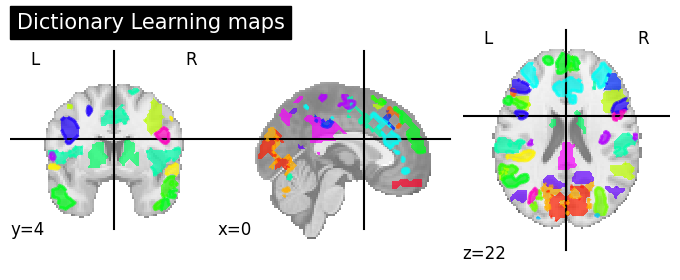

In [15]:
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')


from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)

# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

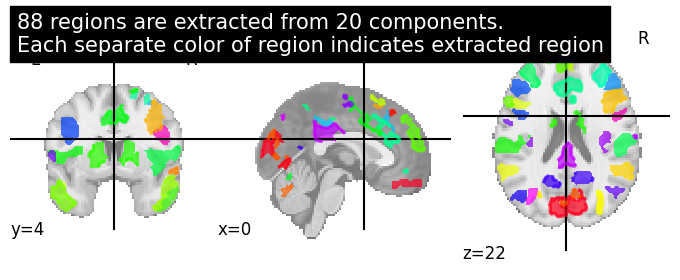

In [16]:
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 20))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

In [17]:
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')

# call transform from RegionExtractor object to extract timeseries signals
timeseries_each_subject = extractor.transform(img, confounds=None)
# call fit_transform from ConnectivityMeasure object
correlation = connectome_measure.fit_transform([timeseries_each_subject])
# saving each subject correlation to correlations
correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

/usr/local/lib/python3.10/dist-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/nilearn/connectome/connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


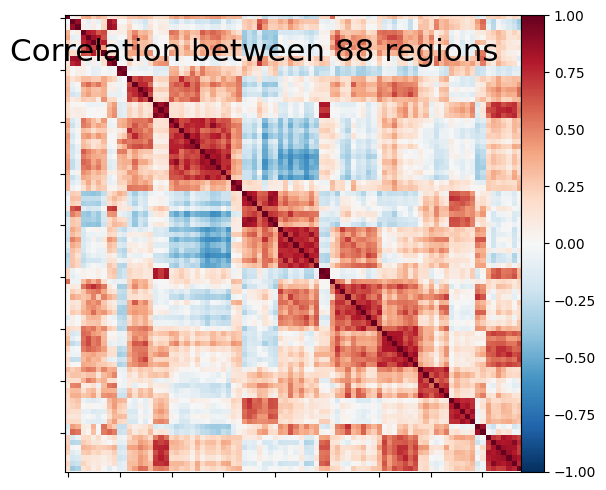

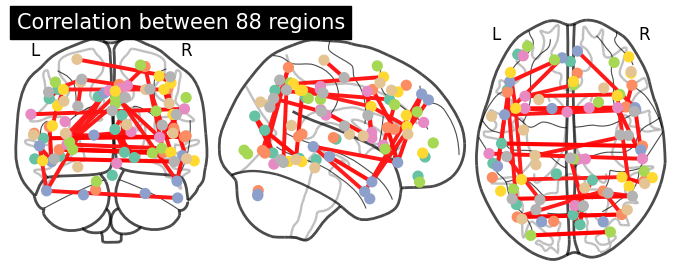

In [18]:
# ----------------------------

title = 'Correlation between %d regions' % n_regions_extracted

# First plot the matrix
display = plotting.plot_matrix(mean_correlations, vmax=1, vmin=-1,
                               colorbar=True, title=title)

# Then find the center of the regions and plot a connectome
regions_img = regions_extracted_img
coords_connectome = plotting.find_probabilistic_atlas_cut_coords(regions_img)

plotting.plot_connectome(mean_correlations, coords_connectome,
                         edge_threshold='99%', title=title)  

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


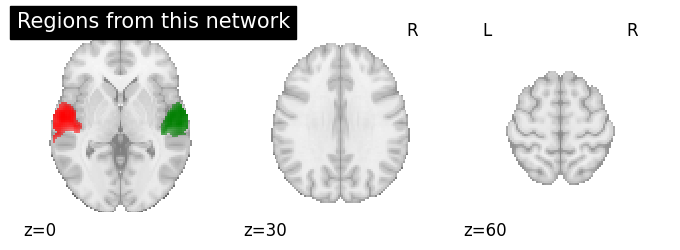

In [19]:
import nilearn
regions_indices_of_map3 = np.where(np.array(regions_index) == 4)

display = plotting.plot_anat(cut_coords=3,
                             title='Regions from this network',
                             display_mode="z")

# Add as an overlay all the regions of index 4
colors = 'rgbcmyk'
for each_index_of_map3, color in zip(regions_indices_of_map3[0], colors):
    display.add_overlay(nilearn.image.index_img(regions_extracted_img, each_index_of_map3),
                        cmap=plotting.cm.alpha_cmap(color))

plotting.show()

In [20]:
# Slice specific timepoint: Unluckily, there is only one desired spatial term exist in chapter 1
            #intervals [1705]:
            #xmin = 553.1455000000001 
            #xmax = 553.5555 
            #text = "ahead" 


In [21]:
# t_r = 2
result_data = img_data[:,:,:,276:277]
result_data.shape
#print(result_data)

(73, 90, 74, 1)

In [22]:
result_img = nib.Nifti1Image(result_data, affine=img.affine)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



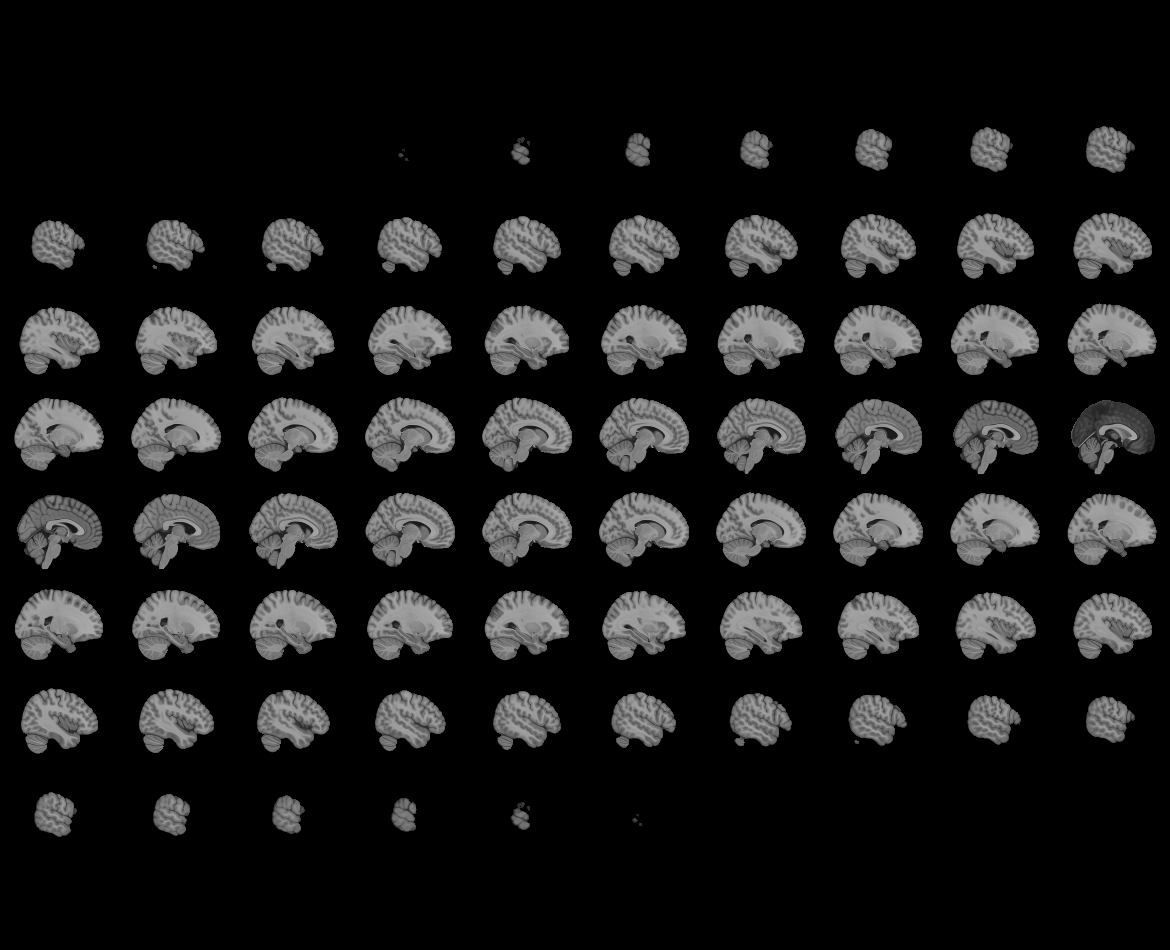
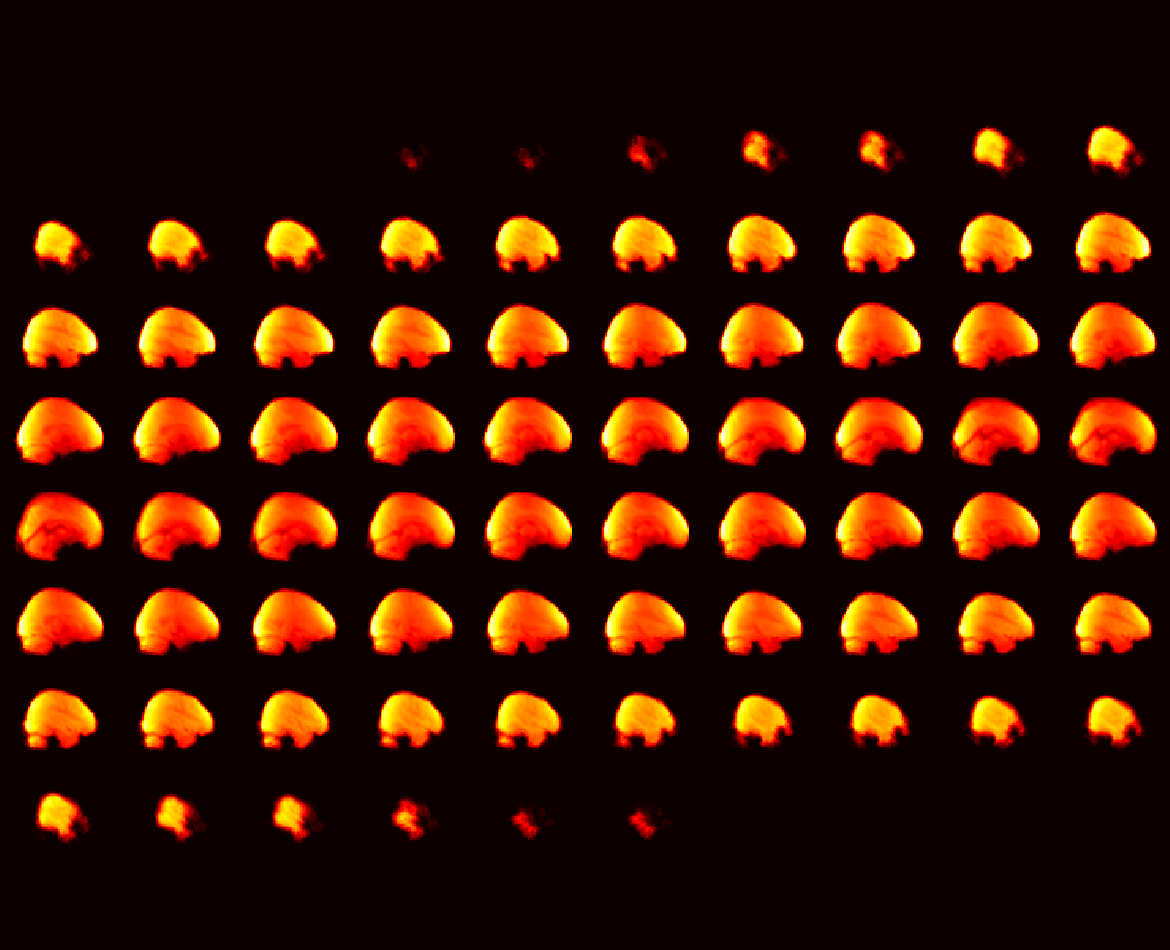

In [23]:
from nilearn import plotting
from nilearn.image import mean_img

plotting.view_img(mean_img(result_img), threshold=None)

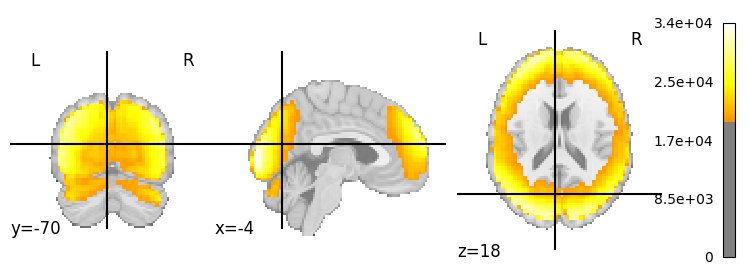

In [24]:
from nilearn import plotting
plotting.plot_stat_map(result_img, threshold=20000)


Dataset created in /root/nilearn_data/fsl



Downloaded 12378112 of 25716861 bytes (48.1%,    2.2s remaining) ...done. (4 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/c4d84bbdf5c3325f23e304cdea1e9706/HarvardOxford.tgz..... done.


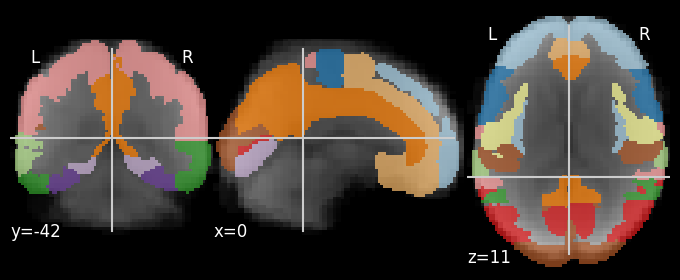

In [25]:
# Harvard-Oxford Atlas
from nilearn import datasets
dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
roi_mask_ho = nib.load(dataset_ho.filename)

plotting.plot_roi(roi_img=roi_mask_ho, bg_img=result_img, cmap='Paired', display_mode='ortho', title='')
plotting.show()


Downloaded 876544 of 3740787 bytes (23.4%,    3.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/ab1b53038e13028e55f691a69003c208/Juelich.tgz..... done.


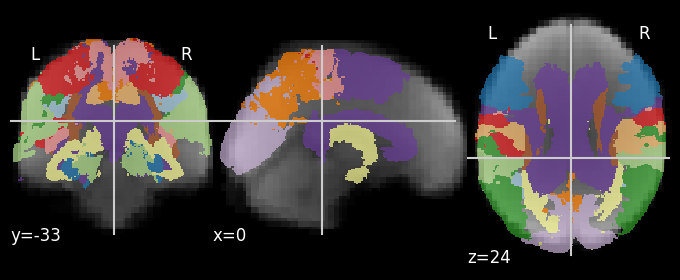

In [26]:
# Juelich atlas
dataset_ju = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
roi_mask_ju = nib.load(dataset_ju.filename)

plotting.plot_roi(roi_img=roi_mask_ju, bg_img=result_img, cmap='Paired', display_mode='ortho', title='')
plotting.show()

In [27]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiMapsMasker

atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas["maps"]

masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(result_img)
time_series = masker.transform(result_img, confounds=None)



Dataset created in /root/nilearn_data/msdl_atlas



 ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.


[NiftiMapsMasker.fit] loading regions from /root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8cc3005510>, interpolation='continuous', target_shape=(73, 90, 74), target_affine=array([[   2.,   -0.,   -0.,  -72.],
       [  -0.,    2.,   -0., -106.],
       [   0.,    0.,    2.,  -64.],
       [   0.,    0.,    0.,    1.]]))


/usr/local/lib/python3.10/dist-packages/nilearn/_utils/cache_mixin.py:243: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn(


_____________________________________________________resample_img - 7.6s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8cc5780fd0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8cc2f038b0>, { 'allow_overlap': True,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Im

/usr/local/lib/python3.10/dist-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


_______________________________________________filter_and_extract - 2.7s, 0.0min


/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_maps_masker.py:551: UserWarning: Persisting input arguments took 0.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [28]:
report = masker.generate_report(displayed_maps=list(range(1, 39)))
report

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Parameter,Value
allow_overlap,True
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
maps_img,/root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
mask_img,None
memory,Memory(location=nilearn_cache/joblib)
memory_level,1
